## Network science 3

In [207]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import collections

## 1. BA modelを実装してみる
Preferential attachmentは上手いこと実装

In [228]:
def barabasi_model(n,k):
    if(k>5):
        print("Please set 5>k")
        return 0
    
    edges_list=np.array([[0,1],[0,2],[0,3],[0,4],[1,2],[1,3],[1,4],[2,3],[2,4],[3,4]])
    target=edges_list.flatten()
    
    for i in range(n-5):
        select_list=np.array([])
        while(len(select_list)<k):
            r=np.random.randint(0,len(target))
            if(target[r] not in select_list):
                edges_list=np.vstack((edges_list,[i+5,target[r]]))
                select_list=np.append(select_list,target[r])
        target=np.append(target,select_list)
        for tt in range(k):
            target=np.append(target,i+5)
    
    return edges_list

In [232]:
#リストで出力
elist=barabasi_model(150,4)

#networkxに入れてどうなっているか確認
G=nx.Graph()
G.add_edges_from(elist)

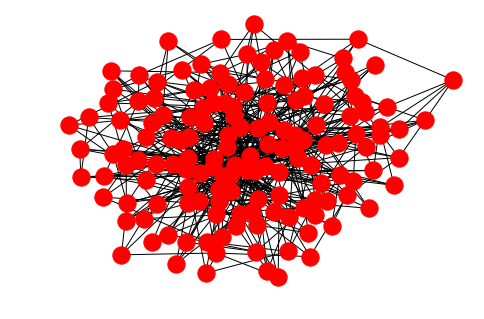

In [233]:
%matplotlib inline
nx.draw_spring(G)

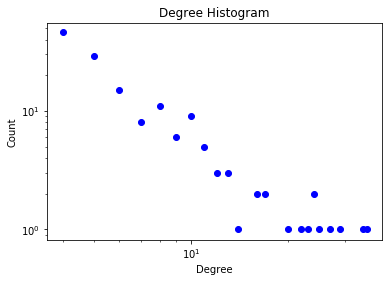

In [234]:
# Sampleコードを引用したもの、次数分布を示す(log-log)
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.scatter(deg, cnt, color='b')
#plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)
ax.set_xscale('log')
ax.set_yscale('log')

plt.show()

ちゃんと実装されている

## 2. Growing Exponential Network 実装

In [212]:
def GEN(n,k):
    if(k>5):
        print("Please set 5>k")
        return 0
    
    edges_list=np.array([[0,1],[0,2],[0,3],[0,4],[1,2],[1,3],[1,4],[2,3],[2,4],[3,4]])
    target=np.array([0,1,2,3,4])
    
    for i in range(n-5):
        select_list=np.array([])
        while(len(select_list)<k):
            r=np.random.randint(0,len(target))
            if(target[r] not in select_list):
                edges_list=np.vstack((edges_list,[i+5,target[r]]))
                select_list=np.append(select_list,target[r])
        target=np.append(target,i+5)
    
    return edges_list

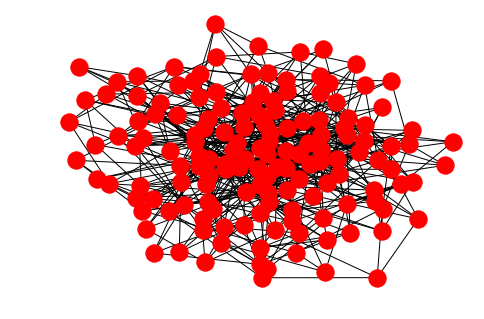

In [235]:
gen_list=GEN(150,4)
G=nx.Graph()
G.add_edges_from(gen_list)
nx.draw_spring(G)

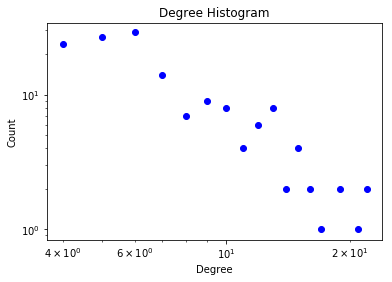

In [236]:
# Sampleコードを引用したもの、次数分布を示す(log-log)

degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.scatter(deg, cnt, color='b')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)
ax.set_xscale('log')
ax.set_yscale('log')

plt.show()

これだけだと分かりづらいのでBA modelと比較

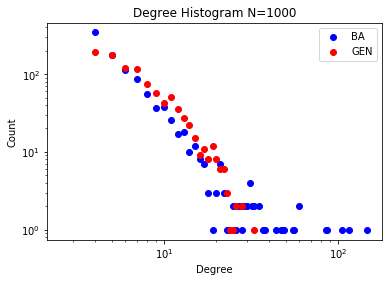

In [238]:
n=1000
k=4
ba_list=barabasi_model(n,k)
gen_list=GEN(n,k)

G_ba=nx.Graph()
G_gen=nx.Graph()
G_ba.add_edges_from(ba_list)
G_gen.add_edges_from(gen_list)

degree_sequence = sorted([d for n, d in G_ba.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.scatter(deg, cnt, color='b',label='BA')
#plt.bar(deg, cnt, width=0.80, color='b')


degree_sequence_gen = sorted([d for n, d in G_gen.degree()], reverse=True)  # degree sequence
degreeCount_gen = collections.Counter(degree_sequence_gen)
deg_gen, cnt_gen = zip(*degreeCount_gen.items())

plt.scatter(deg_gen, cnt_gen, color='r',label='GEN')

plt.title("Degree Histogram N="+str(n))
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)
ax.set_xscale('log')
ax.set_yscale('log')
plt.legend()

plt.show()

## 3. D-D modelはnetworkxにあったりする

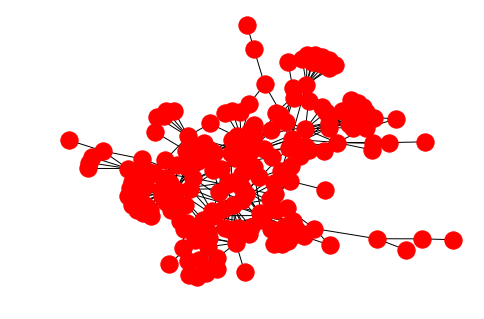

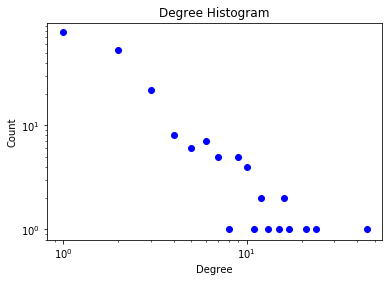

In [216]:
n=200
p=0.25
# Duplication Divergence model 
G=nx.duplication_divergence_graph(n, p, seed=None)

nx.draw_spring(G)

# Sampleコードを引用したもの、次数分布を示す(log-log)
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
fig, ax = plt.subplots()
plt.scatter(deg, cnt, color='b')
plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)
ax.set_xscale('log')
ax.set_yscale('log')

plt.show()

## 4. 次数相関と隣接ノード平均次数

In [217]:
# BA model 
elist=barabasi_model(1000,4)
G=nx.Graph()
G.add_edges_from(elist)
r=nx.degree_assortativity_coefficient(G)
print("BA model\nassortativity : "+str(r))

BA model
assortativity : -0.07042190608605753


In [218]:
rr=nx.degree_pearson_correlation_coefficient(G)
print("Peason correlation : "+str(rr))

Peason correlation : -0.07042190608605772


### 次数相関の実装は式をそのまま書くとできる
ただし、いくつか異なる表記があるので注意

今回は次の定義に従う  
$$
r\equiv \cfrac{4M\sum_e(k_ek_e')-[\sum_e(k_e+k_e')]^2}{2M\sum_e(k_e^2+k_e'^2)-[\sum_e(k_e+k_e')]^2}
$$

In [219]:
def corr(degree_list,edges_list):
    kk=0
    kpk=0
    kkpkk=0
    M=len(edges_list)
    for i in range(M):
        kk+=degree_list[int(edges_list[i][0])]*degree_list[int(edges_list[i][1])]
        kpk+=degree_list[int(edges_list[i][0])]+degree_list[int(edges_list[i][1])]
        kkpkk+=degree_list[int(edges_list[i][0])]**2+degree_list[int(edges_list[i][1])]**2
    
    return (4.0*M*kk-(kpk)**2)/(2.0*M*kkpkk-kpk**2)

degree=np.zeros(int(np.max(elist)+1))
for i in range(len(elist)):
    degree[int(elist[i][0])]+=1
    degree[int(elist[i][1])]+=1
corr(degree,elist)

-0.07042190608605771

### 隣接ノードの平均次数

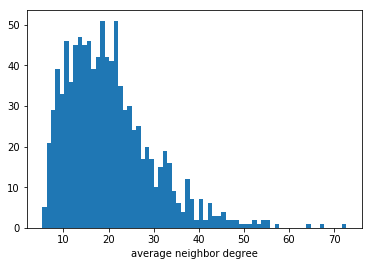

In [220]:
knn=nx.average_neighbor_degree(G)
#print(knn)
knn_items=list(knn.values())
#print(knn_items)

plt.hist(knn_items,bins=int(np.max(knn_items)-np.min(knn_items)+1))
plt.xlabel("average neighbor degree")
plt.show()

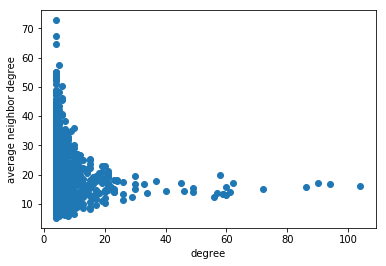

In [221]:
# 次数とその隣接ノード次数を示したもの
deg=nx.degree(G)
k=np.zeros(G.number_of_nodes())
for i in range(G.number_of_nodes()):
    k[i]=deg[i]
#print(knn_items)
plt.xlabel('degree')
plt.ylabel('average neighbor degree')
plt.scatter(k,knn_items)
plt.show()